# Find S Algorithm

In [15]:
import numpy as np
import pandas as pd

# A quick look at PANDAS API: Python Data Analysis Library

### 1. Creating a Series by passing a list of values

In [16]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# Creating A DataFrame

In [17]:
df = pd.DataFrame(
{
    "A":1.0,
    "B":pd.Timestamp("20221229"),
    "C":pd.Series(1,index = list(range(4)), dtype='float32'),
    "D":np.array([3]*4, dtype='int32'),
    "E":pd.Categorical(['train','train','train','train']),
    "F":"MLWP",
}
)
df

,A,B,C,D,E,F
0,1.0,2022-12-29,1.0,3,train,MLWP
1,1.0,2022-12-29,1.0,3,train,MLWP
2,1.0,2022-12-29,1.0,3,train,MLWP
3,1.0,2022-12-29,1.0,3,train,MLWP


In [18]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# df.'Press TAB Button and see what happens'

### Viewing data

In [19]:
df.head()
df.tail(3)
df.index

Int64Index([0, 1, 2, 3], dtype='int64')

## NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.

In [20]:
df.to_numpy()

array([[1.0, Timestamp('2022-12-29 00:00:00'), 1.0, 3, 'train', 'MLWP'],
       [1.0, Timestamp('2022-12-29 00:00:00'), 1.0, 3, 'train', 'MLWP'],
       [1.0, Timestamp('2022-12-29 00:00:00'), 1.0, 3, 'train', 'MLWP'],
       [1.0, Timestamp('2022-12-29 00:00:00'), 1.0, 3, 'train', 'MLWP']],
      dtype=object)

### statistic summary of your data

In [21]:
df.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [22]:
df.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,MLWP,train,3,1.0,2022-12-29,1.0
1,MLWP,train,3,1.0,2022-12-29,1.0
2,MLWP,train,3,1.0,2022-12-29,1.0
3,MLWP,train,3,1.0,2022-12-29,1.0


# Indexing in Pandas Dataframes

In [23]:
df['A']  # S = df['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [24]:
df[['B','A']] = df[['A','B']]
df

,A,B,C,D,E,F
0,2022-12-29,1.0,1.0,3,train,MLWP
1,2022-12-29,1.0,1.0,3,train,MLWP
2,2022-12-29,1.0,1.0,3,train,MLWP
3,2022-12-29,1.0,1.0,3,train,MLWP


# Accessing Attributes

In [25]:
sa = pd.Series([1, 2, 3], index=list('abc'))
sa.c

3

In [26]:
sa.a = 5
sa

a    5
b    2
c    3
dtype: int64

In [27]:
dfa = df.copy()
dfa.A

0   2022-12-29
1   2022-12-29
2   2022-12-29
3   2022-12-29
Name: A, dtype: datetime64[ns]

In [28]:
dfa.A = list(range(len(dfa.index)))
dfa  # Replace a Column in the dataframe.

,A,B,C,D,E,F
0,0,1.0,1.0,3,train,MLWP
1,1,1.0,1.0,3,train,MLWP
2,2,1.0,1.0,3,train,MLWP
3,3,1.0,1.0,3,train,MLWP


In [29]:
dfa['G'] = list(range(len(dfa.index)))
dfa  # Creates New Column

,A,B,C,D,E,F,G
0,0,1.0,1.0,3,train,MLWP,0
1,1,1.0,1.0,3,train,MLWP,1
2,2,1.0,1.0,3,train,MLWP,2
3,3,1.0,1.0,3,train,MLWP,3


In [30]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x

,x,y
0,1,3
1,2,4
2,3,5


In [31]:
x.iloc[0,1]
x.iloc[2]
x.iloc[:1]  # Index Locations in Dataframes
x.iloc[:-1]
x.iloc[::1]
x.iloc[::-1]
x.iloc[::-2]

,x,y
2,3,5
0,1,3


In [32]:
x.iloc[1] = {'x': 9, 'y': 99}
x

,x,y
0,1,3
1,9,99
2,3,5


# Read the data from csv file

In [33]:
#data = pd.read_csv("Data_Find_S.csv")
data = pd.read_csv('Data_Find_S_Class_example.csv')

In [34]:
data

,Example,Sky,Air Temp,Humidity,Wind,Water,Forecast,Enjoy Sport
0,1,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,2,Sunny,Warm,High,Strong,Warm,Same,Yes
2,3,Rainy,Cold,High,Strong,Warm,Change,No
3,4,Sunny,Warm,High,Strong,Cool,Change,Yes


In [35]:
print(data,"n")

   Example    Sky Air Temp Humidity    Wind Water Forecast Enjoy Sport
0        1  Sunny     Warm   Normal  Strong  Warm     Same         Yes
1        2  Sunny     Warm     High  Strong  Warm     Same         Yes
2        3  Rainy     Cold     High  Strong  Warm   Change          No
3        4  Sunny     Warm     High  Strong  Cool   Change         Yes n


# Transform 'data' into an array of all the attributes

In [36]:
d = np.array(data)[:,:-1]
print("n The attributes are: ",d)

n The attributes are:  [[1 'Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 [2 'Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 [3 'Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 [4 'Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]


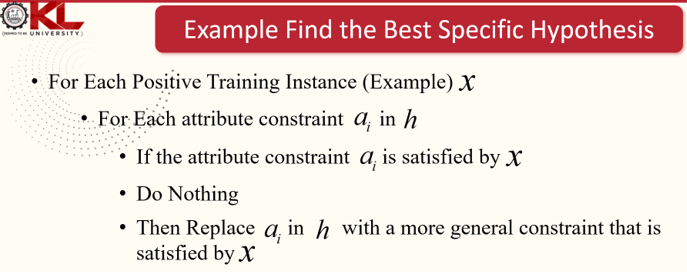

# S1: Initialize the h to most specific hypotheses in H

In [37]:
print("\nThe total number of training instances/Examples are : ",len(data))


The total number of training instances/Examples are :  4


In [38]:
Number_of_Attributes = data[::-1].shape[1] - 1
Number_of_Attributes

7

# MY SPECIFIC NULL Hypotheses is

In [39]:
print("\nThe initial Specific hypothesis is : ")
hypothesis = ['0']*Number_of_Attributes
print(hypothesis)


The initial Specific hypothesis is : 
['0', '0', '0', '0', '0', '0', '0']


## Convert data into an array

In [40]:
d = np.array(data)
d

array([[1, 'Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
       [2, 'Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
       [3, 'Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
       [4, 'Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']],
      dtype=object)

 # For each positive training instance x

In [41]:
d.shape[1] # Data select number of attribures

8

In [42]:
d.shape[0] # Data select number of examples or instances

4

In [43]:
d[1,7]

'Yes'

In [44]:
len(d) # Select Examples

4

In [45]:
for i in range(0,len(d)):
    if d[i][Number_of_Attributes] == 'Yes':
        # From each example select 7th target
        print("\Instance", i+1, 'is', d[i],'a Positive Instance')

\Instance 1 is [1 'Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same' 'Yes'] a Positive Instance
\Instance 2 is [2 'Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'Yes'] a Positive Instance
\Instance 4 is [4 'Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change' 'Yes'] a Positive Instance


In [46]:
for i in range(0,len(d)):
    if d[i][Number_of_Attributes] == 'Yes':
        # From each example select 7th target and if its a Yes enters loop
        print("\nInstance", i+1, 'is', d[i],'a Positive Instance')
        for j in range(0,Number_of_Attributes):
            # For each positive example access each attribute to form hypothesis
            if hypothesis[j] == '0' or hypothesis[j] == d[i][j]: 
                # Replace all negative with positive
                hypothesis[j] = d[i][j]
            else:
                hypothesis[j] = '?'
        print("The Hypothesis for the training instnace", i+1, 'is:',hypothesis,'\n')
    if d[i][Number_of_Attributes] == 'No':
        print('\nInstance', i+1, 'is', d[i],'Negative Instance, Ignored')
print('\nThe Maximally Specific Hypothesis for this Training Example is',hypothesis)


Instance 1 is [1 'Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same' 'Yes'] a Positive Instance
The Hypothesis for the training instnace 1 is: [1, 'Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'] 


Instance 2 is [2 'Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'Yes'] a Positive Instance
The Hypothesis for the training instnace 2 is: ['?', 'Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same'] 


Instance 3 is [3 'Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change' 'No'] Negative Instance, Ignored

Instance 4 is [4 'Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change' 'Yes'] a Positive Instance
The Hypothesis for the training instnace 4 is: ['?', 'Sunny', 'Warm', '?', 'Strong', '?', '?'] 


The Maximally Specific Hypothesis for this Training Example is ['?', 'Sunny', 'Warm', '?', 'Strong', '?', '?']


# Extract the target function that has positive and negative examples 

In [47]:
target = np.array(data)[:,-1]
print("n The target is: ",target)

n The target is:  ['Yes' 'Yes' 'No' 'Yes']


# training function to implement find-s algorithm

In [48]:
def train(c,t):
    for i, val in enumerate(t):
        if val == "Yes":
            specific_hypothesis = c[i].copy()
            break
            
    for i, val in enumerate(c):
        if t[i] == "Yes":
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
                else:
                    pass
                 
    return specific_hypothesis

In [49]:
#obtaining the final hypothesis
print("n The final hypothesis is:",train(d,target))

n The final hypothesis is: ['?' 'Sunny' 'Warm' '?' 'Strong' '?' '?' 'Yes']
